In [12]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import trigrams
from nltk import bigrams
from collections import Counter
from typing import Dict, List, Optional, Union, cast


import os
import time
import csv


import requests
import prepare

from sklearn.model_selection import train_test_split

#statistical testing
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Project Planning

The goal of this project is to use Natural Language Processing in order to build a predictive model of programming languages using the text from a users Github repository's readme.md. Planning for this project involved:

- Acquire data by webscraping Github to obtain enough text from repositories of *finish this sentence

- Create a readme.md, data dictionary, visualizations to accompany a formal presentation, and a Final Report Notebook.

- Clean and prepare the data for the first iteration through the data science pipeline, and automate these processes by storing as functions where applicable.

- Clearly define at least two hypotheses, set an alpha, run statistical tests as needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.

- Establish the baseline accuracy and document well.

- Train several classification models.

- Evaluate models on train and validate datasets.

- Document executive summary, conclusions, takeaways, and next steps in the Final Report Notebook.

- Upload readme.md, data dictionary, prepare.py, acquire.py, and Final Report Notebook.

# Executive Summary

- The languages chosen to build the predictive model were: Python,Java, R, HTML, and JavaScript. 

- The models used were *insert model names here* with the best performing model being *insert model here*

    - *if applicable insert features included in the model here*:
    
        - feature
        - feature 
        - feature
   
- *insert interesting observation/takeaway*

- *insert whether or not the model beat baseline*

- *insert insights from eda/statistical testing here*

# Acquire

- This data was obtained from Github *finish sentence*

- *something, something dark side*

- *something, something Darth Maul*

In [98]:
  #train, test, split
train_validate, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.language)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123, stratify = train_validate.language)

train.head()

,repo,language,readme_contents,stemmed,lemmatized,total_words
433,vjcho/lemonade,HTML,"# lemonade\n\n“I was served lemons, but I made...",lemonadei serv lemon made lemonad despit pain ...,lemonadei served lemon made lemonade despite p...,41
1804,Henry-Cook/NYS-Mental-Health-Services-Locator,JavaScript,# New York State Mental Health Services Locato...,new york state mental health servic locat proj...,new york state mental health service locator p...,590
204,Paulwamaria/whisper-blog,Python,# WHISPER BLOG\n\n## Description\n\nWHISPERING...,whisper blog descriptionwhisperingi web applic...,whisper blog descriptionwhisperingis web appli...,121
1492,ChanceYoung/MentalHealthSurvey,JavaScript,# MentalHealthSurvey\nMental Health Survey for...,mentalhealthsurveyment health survey snow coll...,mentalhealthsurveymental health survey snow co...,56
959,Etan01/CalmMind-quickhack,HTML,# QuickHack 2021 - Calm Mind \n\n#### <u>Open ...,quickhack 2021 calm mind open categoryteam mem...,quickhack 2021 calm mind open categoryteam mem...,210


# Prepare

- We scraped *insert how many* Github repositories

- Initially, *insert how many languages* were included

- In order to improve accuracy during the modeling process, this project focused on the top five programming languages that came up in the repository search *insert topic here if applicable*, which are:

    - Java
    - HTML
    - Python
    - R
    - JavaScript

# Explore

### Language Histograms/ Visualization?

<AxesSubplot:>

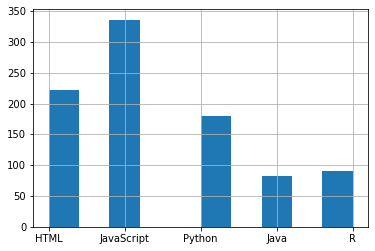

In [82]:
train.language.hist()

array([[<AxesSubplot:title={'center':'total_words'}>]], dtype=object)

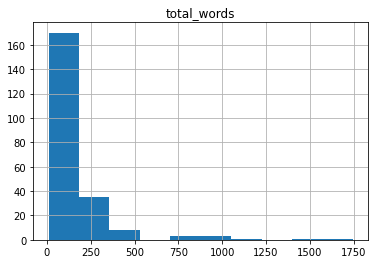

In [97]:
train.loc[train['language'] == 'HTML'].hist()

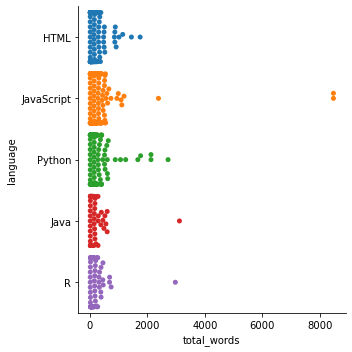

In [95]:
#plt.figure(fig_size = (10, 8))
sns.catplot(data = train,
           x = 'total_words',
           y = 'language',
           kind = 'swarm')

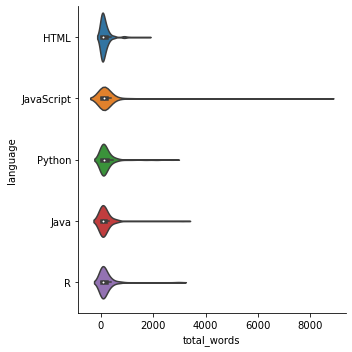

In [90]:
sns.catplot(data = train,
           x = 'total_words',
           y = 'language',
           kind = 'violin')

---

- Put this in a function

In [75]:
langs = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
langs.columns = ['counts', 'percent']
langs

#maybe show this as histograms or count plots

,counts,percent
JavaScript,600,0.368777
HTML,396,0.243393
Python,320,0.196681
R,162,0.099570
Java,149,0.091580


- Function?

In [39]:
ADDITIONAL = ['The', 'I', 'This', 'app', 'run', 'project', 'user', 'use', 'mental', 'file', 'health',
       'create', 'page', 'code', 'also', 'help', 'used']
             
def clean(readme_contents):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL
    text = (unicodedata.normalize('NFKD', readme_contents)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #words = re.sub(r'[^a-z\s]', '', text).split()
    words = re.sub (r'([^a-zA-Z ]+?)', "", text).split()
    #words = re.sub(r'[\D]', '', words).split()
    
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


#making dfs with clean function for all langs
JavaScript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
HTML_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))
Python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))
Java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))
R_words = clean(' '.join(df[df.language == 'R'].readme_contents))
all_words = clean(' '.join(df.readme_contents))


#make dfs to show frequencies of words

JavaScript_freq = pd.Series(JavaScript_words).value_counts()
HTML_freq = pd.Series(HTML_words).value_counts()
Python_freq = pd.Series(Python_words).value_counts()
Java_freq = pd.Series(Java_words).value_counts()
R_freq = pd.Series(R_words).value_counts()
all_freq = pd.Series(all_words).value_counts()


word_counts = (pd.concat([all_freq, JavaScript_freq, HTML_freq, Python_freq, 
                    Java_freq, R_freq], axis=1, sort=True)
                .set_axis(['all_words', 'JavaScript', 'HTML', 'Python', 'Java', 'R'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all_words,JavaScript,HTML,Python,Java,R
aa,2,0,1,0,1,0
aaa,1,0,0,0,1,0
aaaa,3,0,0,1,0,2
aac,1,0,0,0,1,0
aachal,2,2,0,0,0,0


In [5]:
df = prepare.wrangle_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1627 non-null   object
 1   language         1627 non-null   object
 2   readme_contents  1627 non-null   object
 3   stemmed          1627 non-null   object
 4   lemmatized       1627 non-null   object
 5   total_words      1627 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 89.0+ KB


In [8]:
df.head()

,repo,language,readme_contents,stemmed,lemmatized,total_words
0,kharrigian/mental-health-datasets,Python,\n# Mental Health Datasets\n\nThe information ...,mental health datasetsth inform evolv list dat...,mental health datasetsthe information evolving...,2716
1,behavioral-data/Empathy-Mental-Health,Python,# Empathy in Text-based Mental Health Support\...,empathi textbas mental health supportthi repos...,empathy textbased mental health supportthis re...,400
2,stutisehgal/RASA-Mental-Health-Chatbot,Python,# RASA-Mental-Health-Chatbot\n\nMental health ...,rasamentalhealthchatbotment health chatbot dev...,rasamentalhealthchatbotmental health chatbot d...,55
3,openeobs/openeobs,Python,# Open-eObs\n[![Codacy Badge](https://api.coda...,openeobscodaci badgeutmmediumreferralamputmcon...,openeobscodacy badgeutmmediumreferralamputmcon...,223
4,kharrigian/mental-health-keywords,Python,# Mental Health Keywords for Twitter\n\nThis r...,mental health keyword twitterthi repositori co...,mental health keywords twitterthis repository ...,468


### hypos/questions

- QUESTION 1: do certain languages have a higher average readme word count than others?
- QUESTION 2: are certain frequently occuring words share across more than one language?
- QUESTION 3: what words, if any, are frequently occuring in readmes for certain langauges that are barely prevelant in other language readmes?
- QUESTION 4: what language's readme trends are closest related to the trends of all readmes?

### QUESTION 1

- do certain languages have a higher average readme word count than others?

   
   - in this section: 
            - make bins of high, med, and low readme word counts
            - graph these counts for comparison 
            - run T-test/s on language vs. total counts column
            - summarize findings

In [ ]:
#show averages with group by:
df.total_words.groupby(df.language).mean().round()

In [ ]:
#prep to make bins for the better visual
conditions = [(df.total_words > 171),
              (df.total_words >= 51) & (df.total_words <= 171),
              (df.total_words < 51)]
choices = ['high_count', 'med_count', 'low_count']

df['count_bin'] = np.select(conditions, choices)

In [ ]:
df_plot = df.groupby(['language', 'count_bin']).size().reset_index().pivot(columns='count_bin', index='language', values=0)

In [ ]:
#I like this to show lang counts with bins

df_plot.plot(kind='bar')

#### Takeaways:

- There are certain languages that have a higher average readme word count than others.
- Java has the lowest average word count while those from repositories using JavaScript have considerably more words than the other four programming languages. 

### Are the word counts for JavaScript significantly higher than the mean word counts of all languages?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: JavaScript's mean word count is <= than the combined mean word count of all languages.

𝐻𝑎: JavaScript's mean word count is > than the combined mean word count of all programming languages.

In [67]:
α = 0.05

js_sample = word_counts.JavaScript

overall_mean = word_counts.all_words.mean()

t, p = stats.ttest_1samp(js_sample, overall_mean)

print(f'P Value: {p/2:.3f}')

if p/2 < α and t > 0:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Fail to reject the null hypothesis.


---

### Are the word counts for JavaScript significantly higher than the word counts of Python?

Two Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: Javascript's mean word count is <= than the mean word count of Python.

𝐻𝑎: Javascript's mean word count is > the mean word count of Python.

In [73]:
#test for equal variance 
#H0 is that the variances are equal
#Ha is that the variances are not equal
# if p > .05, variances are not significantly different and set argument to equal_var = True
#if p < .05, variances are significantly different and set argument to equal_var = False
#Levene test on two groups


#set alpha
α = 0.05

#perform test to determine variance
f, p = stats.levene(word_counts.JavaScript,
             word_counts.Python)

#evaluate coefficient and p-value
print(f'Levene\'s F-statistic: {f:.3f}\nP-value: {p:.3f}')


#evaluate if 
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Levene's F-statistic: 285.039
P-value: 0.000
Reject the null hypothesis.


In [74]:
#set alpha
α = 0.05

#perform test
t, p = stats.ttest_ind(word_counts.JavaScript, word_counts.Python, equal_var = False)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of the word counts associated w/ JavaScript is significantly higher than the mean 
# of the mean word counts associated with Python, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


---

### Are the word counts for R significantly lower than the word counts of Python?

Two Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: R's mean word count is >= than the mean word count of Python.

𝐻𝑎: R's mean word count is < the mean word count of Python.

In [70]:
#test for equal variance 
#H0 is that the variances are equal
#Ha is that the variances are not equal
# if p > .05, variances are not significantly different and set argument to equal_var = True
#if p < .05, variances are significantly different and set argument to equal_var = False
#Levene test on two groups


#set alpha
α = 0.05

#perform test to determine variance
f, p = stats.levene(word_counts.R,
             word_counts.Python)

#evaluate coefficient and p-value
print(f'Levene\'s F-statistic: {f:.3f}\nP-value: {p:.3f}')


#evaluate if 
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Levene's F-statistic: 267.514
P-value: 0.000
Reject the null hypothesis.


In [72]:
#set alpha
α = 0.05

#perform test
t, p = stats.ttest_ind(word_counts.R, word_counts.Python, equal_var = False)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of the word counts associated w/ R is significantly lower than the mean 
# of the mean word counts associated with Python, is p/2 < a and t < 0?
if p/2 < α and t < 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


### QUESTION 2: 
- are certain frequently occurring words share across more than one language?

   - in this section: 
   
            - make a top_words dataframe that includes the top 20 most frequently occureing words in each language
            - see if any of of a language's top 20 readme words (not including stopwords) are shared with other language's/s' top 20
            - summarize findings

In [ ]:
#makes dfs for arranging top words by the diff langs to help compare
#if tops in some langs may be way different than tops in others
js_top = word_counts.sort_values(by='JavaScript', ascending=False).head(20)
html_top = word_counts.sort_values(by='HTML', ascending=False).head(20)
python_top = word_counts.sort_values(by='Python', ascending=False).head(20)
java_top = word_counts.sort_values(by='Java', ascending=False).head(20)
r_top = word_counts.sort_values(by='R', ascending=False).head(20)

In [ ]:
#makes one df of the top 20 words in all dfs 
top_words = (pd.concat([js_top, html_top, python_top, java_top,
                    r_top], axis=0, sort=True)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

top_words.head()

In [ ]:
#drops all as we don't need that to compare for next step
top_words= top_words.drop(columns=['all'])

### Graph this?

In [ ]:
#if you want to graph somehow, but not super necessary to include this
top_words

In [ ]:
#these are the frequent words that are shared amongst 2 or more programming languages
tops = top_words[top_words.index.value_counts() > 1]
tops.index.unique()

### QUESTION 2 summary: 

- are certain frequently occurring words share across more than one language?

The following words are amongst the top 20 frequently occurring words (excluding stop words) in 2 or more languages:

'section', 'test', 'install', 'make', 'need', 'feature', 'user', 'time',
       'information', 'file', 'command', 'people', 'one', 'application',
       'model', 'dataset', 'analysis', 'following'

---

# Mindy Redoing, wait!

### QUESTION 3: 
- what words, if any, are frequently occuring in readmes for certain langauges that are barely prevelant in other language readmes?

   - in this section: 
   
            - make dfs (divided for graphing) that looks at the top 20 most frequently occuring words (in all records)
            -change the counts to percentages to show word prevelance per language of the top words
            - graph the relationships
            - run statistical tests to see what top words, if any, have a significant frequency difference in different languages
            - summarize findings

In [ ]:
#just makes dfs of some of the most freq words. divided like this just to make graphs
#look nicer
#most_freq_700 is 700-799 words
#most_freq_800 is 800-999 words
#most_freq is is 1000+
most_freq_700 = word_counts[word_counts['all'] > 700] 
most_freq_700 = most_freq_700[most_freq_700['all'] < 800]
most_freq_800 = word_counts[word_counts['all'] >= 800]
most_freq_800 = most_freq_800[most_freq_800['all'] < 1000]
most_freq = word_counts[word_counts['all'] >= 1000]

In [ ]:
#making dfs to look at these as a percentage and give each language
#equal weight looking at word importance as our records are evenly 
#distributed
word_perc = pd.DataFrame()
for col in most_freq.columns:
    word_perc = word_perc.append(most_freq[col].sort_values(ascending=False)/most_freq[col].sum())

word_perc_700 = pd.DataFrame()
for col in most_freq_700.columns:
    word_perc_700 = word_perc_700.append(most_freq_700[col].sort_values(ascending=False)/most_freq_700[col].sum())
    
word_perc_800 = pd.DataFrame()
for col in most_freq_800.columns:
    word_perc_800 = word_perc_800.append(most_freq_800[col].sort_values(ascending=False)/most_freq_800[col].sum())

In [ ]:
#incase we wanted to use the counts (can do with the 3 most_freq dfs, but I
#think we could skip this and just do the word_perc dfs for the graphs
#as I think they are more meaningful)
plt.rcParams["figure.figsize"] = (20,10)
most_freq.plot(kind='bar')

In [ ]:
#transponsing dfs to make better graphs
word_perc_T = word_perc.T
word_perc_700_T = word_perc_700.T
word_perc_800_T = word_perc_800.T

to look at similarities, we simple look at bars w similar heights. That will show they have a similar distribution of that specific word

In [ ]:
#the next 3 would make sense to do subplots. I'll make a function
#for them, I think we should get rid of all here too
plt.rcParams["figure.figsize"] = (20,8)
word_perc_T.plot(kind='bar')

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_700_T.plot(kind='bar')

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_800_T.plot(kind='bar')

### QUESTION 3 summary: 

- what words, if any, are frequently occuring in readmes for certain langauges that are barely prevelant in other language readmes?

Looking at graphs (and stat tests), these top occuring words may be helpful in identifying said languages:

- 'file': R
- 'website': HTML
- 'application': Java

# Bigrams/Trigrams?

# Wordcloud?

### QUESTION 4: 
- what language's readme trends are closest related to the trends of all readmes?

# Modeling